### 시각화

> Data
- Input: gm_data/csv file (아웃라이어 찾기, Stationary 적용 후 파일)
- Output: 시각화 결과

> Process
1. 데이터 불러오기
2. 시각화

> 코드 구현 날짜
- 2023-11-09

> 개발환경
- Python version: 3.9.7

> 수정내용
- 수정날짜: 2023-00-00
- 수정내용:
1. ...


In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### gm data 불러오기
- gm계산코드 폴더 안에 gm계산 코드를 통해 gm 계산을 마친 데이터프레임은 gm_data에 csv 파일로 저장되어 있음

In [2]:
# 회사 리스트
company_list = ['SK텔레콤', 'KT', 'LG유플러스', '농심', 'CJ제일제당', '오뚜기', '현대차', '한국타이어', 'KB금융', '신한지주']

In [3]:
data = pd.read_csv(f"../gm_data/{company_list[1]}_df.csv") # 원하는 기업 데이터 불러오기

In [4]:
# 한글과 음수 부호가 제대로 표시되는 폰트로 변경
plt.rcParams['font.family'] = 'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 표시 문제 해결

# 모든 컬럼을 표시하도록 설정
pd.set_option('display.max_columns', None)

### 아웃라이어 제거

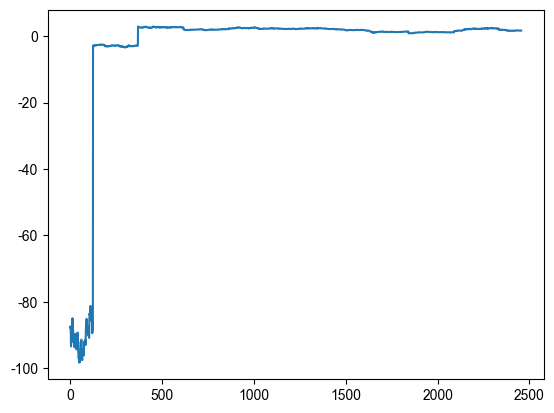

In [5]:
# gm의 추세 파악
plt.plot(data['gm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15f3402e0>,
 'caps': [<matplotlib.lines.Line2D at 0x15f340850>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f0fe7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x15f340d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f358070>],
 'means': []}

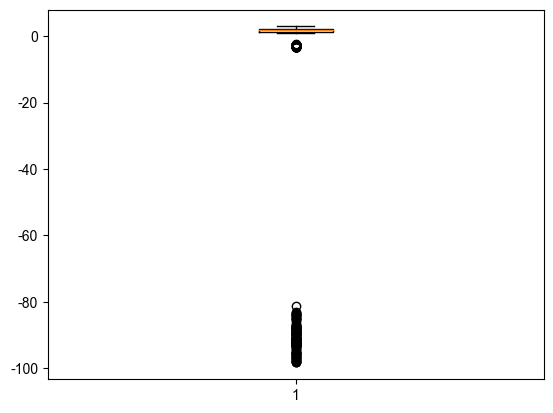

In [6]:
plt.boxplot(data['gm'])

In [7]:
# IQR 계산 및 아웃라이어 정의
Q1 = data['gm'].quantile(0.25)
Q3 = data['gm'].quantile(0.75)
IQR = Q3 - Q1

# 아웃라이어를 정의하는 하한과 상한 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [8]:
# 아웃라이어 제거
df = data[(data['gm'] >= lower_bound) & (data['gm'] <= upper_bound)]

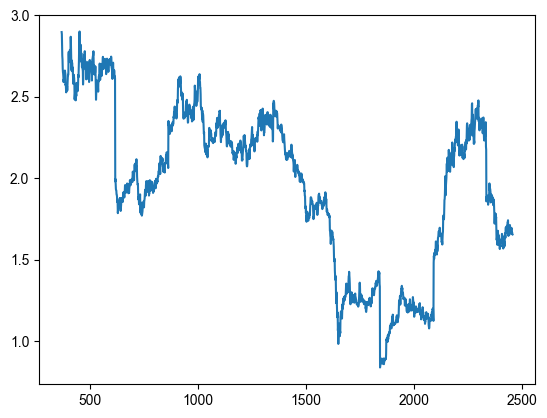

In [9]:
plt.plot(df['gm'])

{'whiskers': [<matplotlib.lines.Line2D at 0x15f432460>,
 'caps': [<matplotlib.lines.Line2D at 0x15f432a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x15f0fea30>],
 'medians': [<matplotlib.lines.Line2D at 0x15f432fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15f4442b0>],
 'means': []}

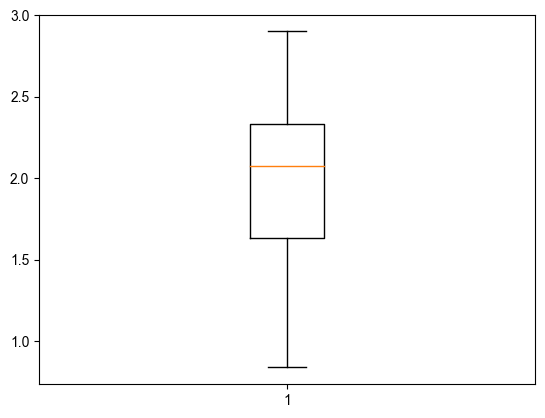

In [10]:
plt.boxplot(df['gm'])

### GM 표준화

- standard scaler 적용  
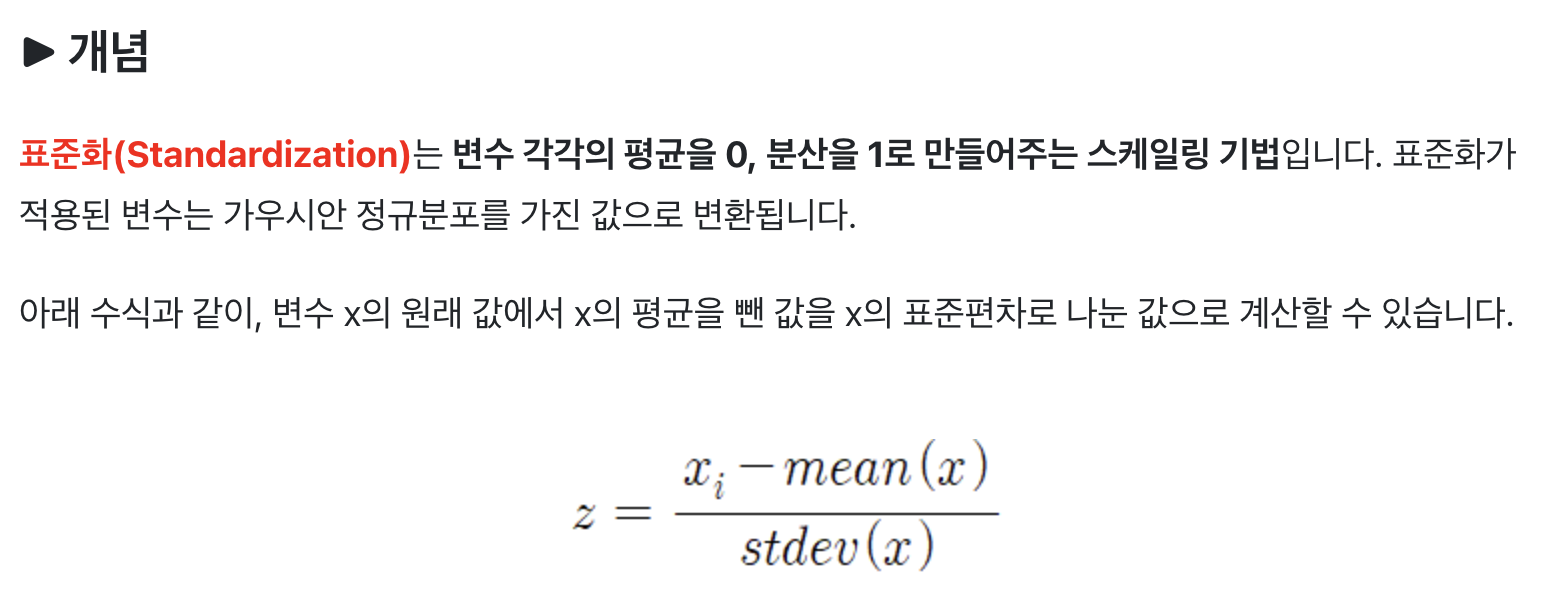

In [11]:
# scikit-learn 패키지의 StandardScaler 클래스를 불러옵니다.
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체를 생성합니다.
scaler = StandardScaler()

# GM에 표준화 적용
df['gm_scaled'] = scaler.fit_transform(df[['gm']])

/var/folders/yd/1_xwcyjj6z58p2vptxk1dwvm0000gn/T/ipykernel_67272/2825572327.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gm_scaled'] = scaler.fit_transform(df[['gm']])


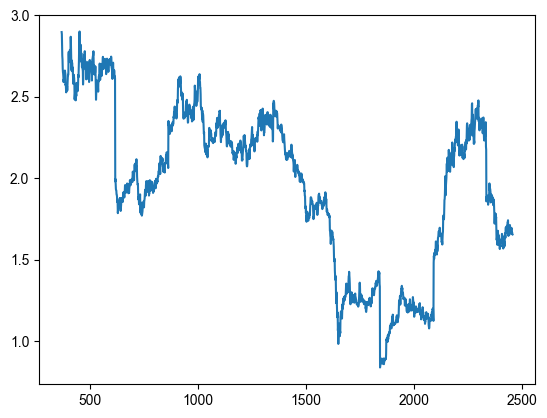

In [12]:
plt.plot(df['gm'])

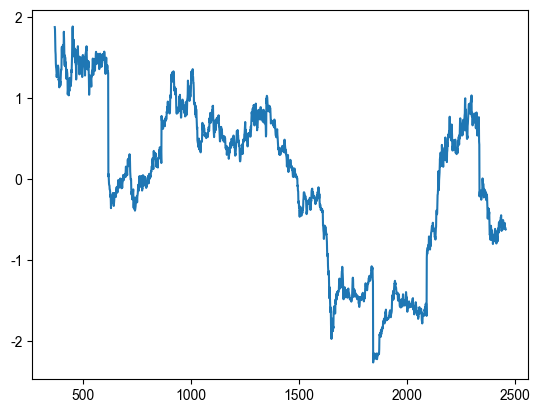

In [13]:
plt.plot(df['gm_scaled'])

gm의 값을 표준화 한다고 해서 gm의 값이 더 Stationary(정상성)하게 변하는 것도 아님. 표준화를 하는 이유에 대한 고민 필요.

시계열 데이터의 특정 컬럼을 보다 정상적(stationary)으로 만들기 위한 몇 가지 방법이 있습니다. 정상 시계열은 시간에 따라 그 통계적 속성(평균, 분산 등)이 일정하게 유지되는 특성을 가지고 있습니다. 비정상 시계열을 정상 시계열로 변환하는 것은 많은 시계열 분석 및 예측 모델링 기법에서 중요한 단계입니다.

1. 차분(Differencing):
시계열 데이터에서 일정 시간 간격으로 연속된 관측값들의 차이를 계산하는 방법입니다.
예를 들어, df['column'].diff() 함수를 사용하여 Pandas에서 간단히 구현할 수 있습니다.
때때로 1차 차분만으로 충분하지 않을 수 있으며, 2차 차분이나 그 이상을 적용할 필요가 있을 수 있습니다.

2. 로그 변환(Log Transformation):
데이터에 로그 변환을 적용하여 변동 폭을 줄이고 데이터의 정상성을 개선할 수 있습니다.
numpy 라이브러리의 log 함수를 사용하여 np.log(df['column'])와 같이 적용합니다.
로그 변환은 데이터에 음수가 없고, 변동이 큰 경우에 효과적일 수 있습니다.

3. 이동 평균법(Moving Average):
시계열 데이터의 이동 평균을 구하여 정상성을 개선할 수 있습니다.
이는 df['column'].rolling(window=window_size).mean()을 통해 구현할 수 있습니다.
이동 평균법은 단기적인 변동성을 제거하는 데 도움이 될 수 있습니다.

4. 계절 차분(Seasonal Differencing):
계절성이 있는 데이터의 경우, 계절 차분을 적용하여 정상성을 개선할 수 있습니다.
예를 들어, 매월 데이터에서 12개월의 계절 차분을 적용하는 것이 일반적입니다.

5. Box-Cox 변환:
데이터의 분산을 안정화시키는 데 사용되는 변환 방법 중 하나입니다.
scipy.stats의 boxcox 함수를 사용하여 적용할 수 있습니다.

In [14]:
# 1. 차분 적용
df['gm_diff'] = df['gm'].diff()

/var/folders/yd/1_xwcyjj6z58p2vptxk1dwvm0000gn/T/ipykernel_67272/276247603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gm_diff'] = df['gm'].diff()


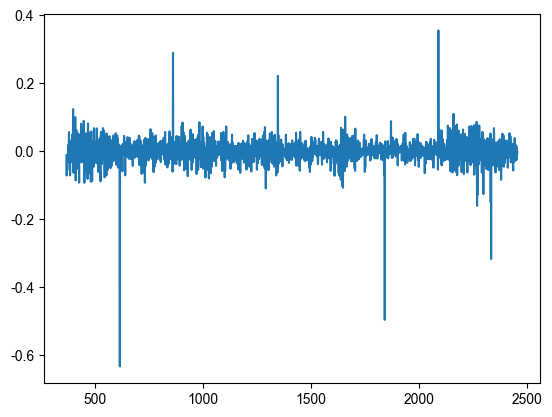

In [15]:
plt.plot(df['gm_diff'])

In [16]:
# 내 맘대로 -0.2부터 0.2 사이의 값으로 정의
lower_bound = -0.2
upper_bound = 0.2
df = df[(df['gm_diff'] >= lower_bound) & (df['gm_diff'] <= upper_bound)]

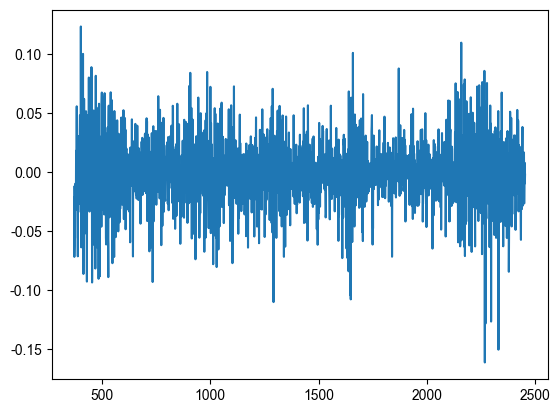

In [17]:
plt.plot(df['gm_diff'])

In [18]:
data['Date'] = pd.to_datetime(data['Date'])

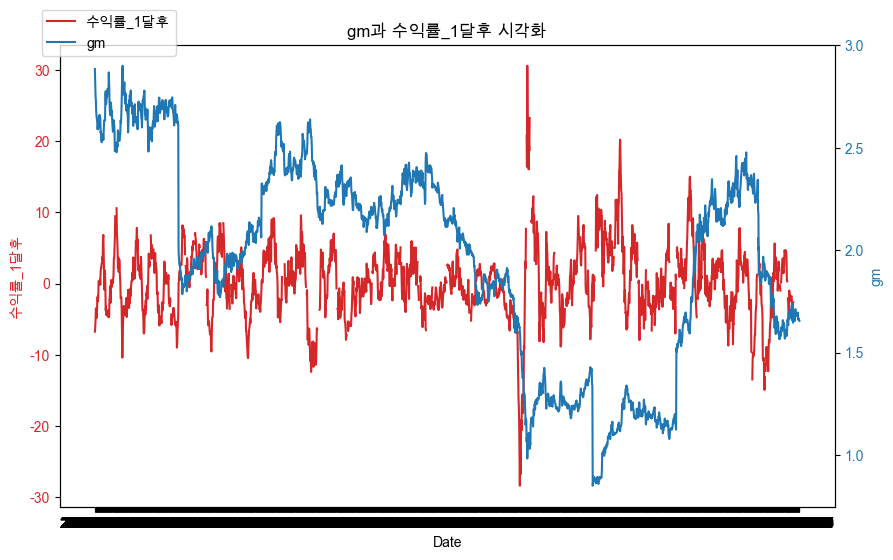

In [19]:
# 1달뒤 수익률 시각화

# 그래프의 기본 틀 생성
fig, ax1 = plt.subplots(figsize=(10, 6))

# ax1에 '수익률_1주후' 그리기
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('수익률_1달후', color=color)
line1, = ax1.plot(df['Date'], df['수익률_1달후'], color=color, label='수익률_1달후')  # label 추가
ax1.tick_params(axis='y', labelcolor=color)

# ax2는 ax1과 x축을 공유하며 y축은 독립적으로 사용
ax2 = ax1.twinx()

# ax2에 'gm' 그리기
color = 'tab:blue'
ax2.set_ylabel('gm', color=color)
line2, = ax2.plot(df['Date'], df['gm'], color=color, label='gm')  # label 추가
ax2.tick_params(axis='y', labelcolor=color)

# 범례 추가
fig.legend(handles=[line1, line2], loc='upper left', bbox_to_anchor=(0.1, 0.95))  # 두 선의 범례를 추가

# 그래프 표시
plt.title("gm과 수익률_1달후 시각화")
plt.show()


<Axes: xlabel='gm', ylabel='Count'>

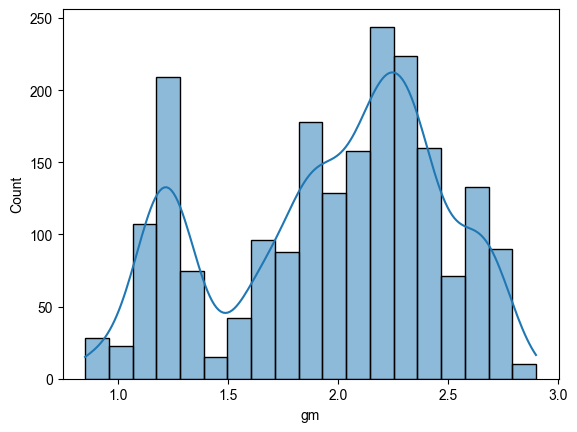

In [20]:
sns.histplot(df[df['gm']>-20]['gm'], kde=True)

<Axes: xlabel='수익률_1달후', ylabel='Count'>

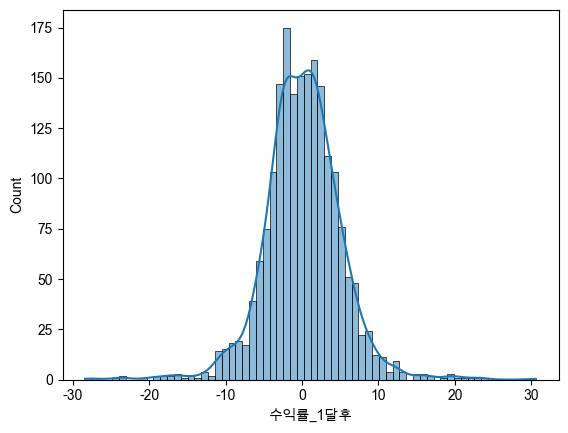

In [21]:
sns.histplot(df['수익률_1달후'], kde=True)

<Axes: xlabel='ROE', ylabel='Count'>

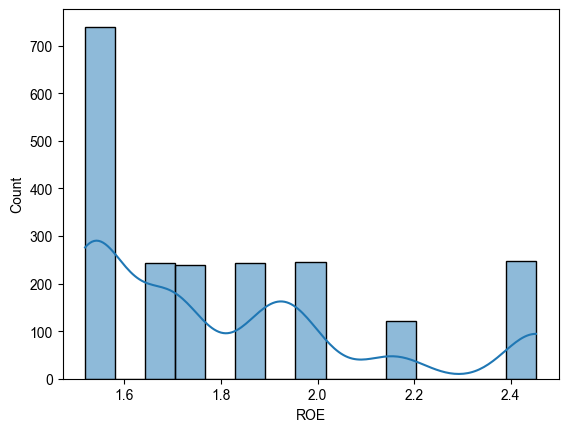

In [22]:
sns.histplot(df['ROE'], kde=True)

<Axes: xlabel='PBR(배)', ylabel='Count'>

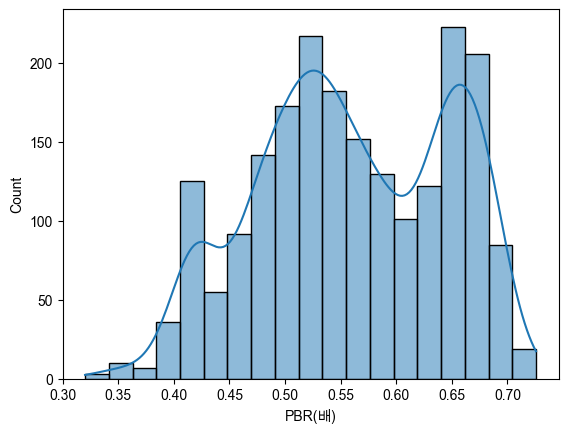

In [23]:
sns.histplot(df['PBR(배)'], kde=True)

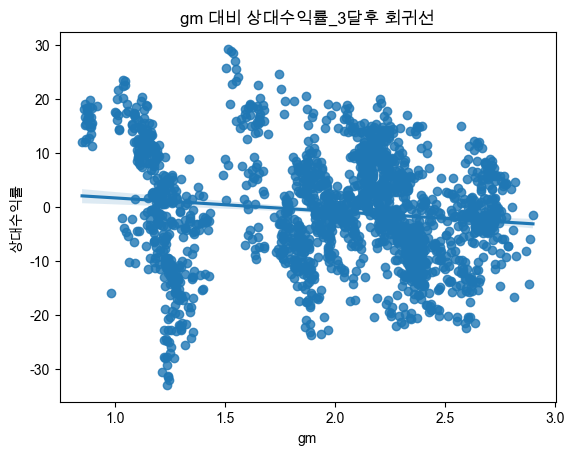

In [24]:
# regplot으로 회귀선과 함께 산점도 그리기
sns.regplot(x='gm', y='상대수익률_3달후', data=df)

# 축 라벨과 타이틀 설정
plt.xlabel('gm')
plt.ylabel('상대수익률')
plt.title('gm 대비 상대수익률_3달후 회귀선')

# 그래프 출력
plt.show()

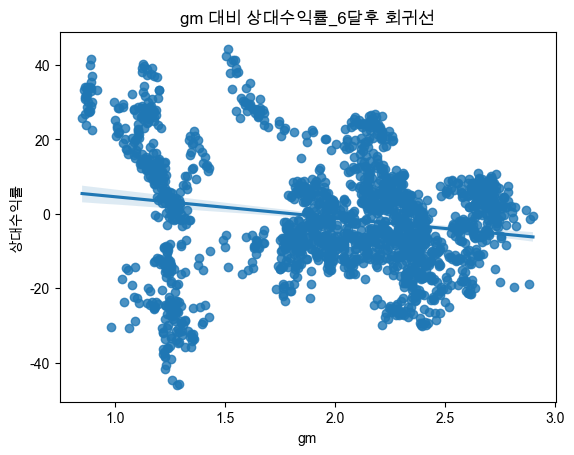

In [25]:
# regplot으로 회귀선과 함께 산점도 그리기
sns.regplot(x='gm', y='상대수익률_6달후', data=df)

# 축 라벨과 타이틀 설정
plt.xlabel('gm')
plt.ylabel('상대수익률')
plt.title('gm 대비 상대수익률_6달후 회귀선')

# 그래프 출력
plt.show()

### gm_diff를 인풋으로!

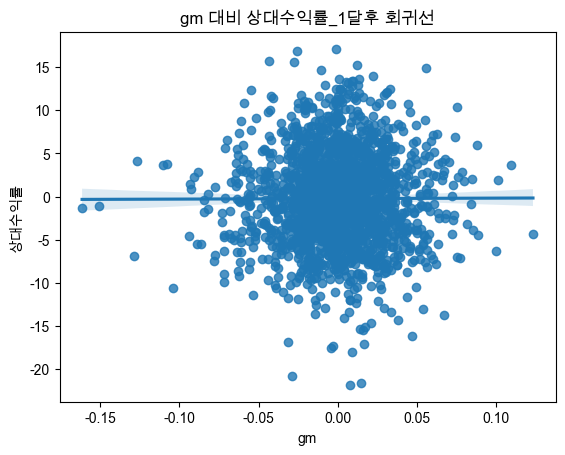

In [26]:
# regplot으로 회귀선과 함께 산점도 그리기
sns.regplot(x='gm_diff', y='상대수익률_1달후', data=df)

# 축 라벨과 타이틀 설정
plt.xlabel('gm')
plt.ylabel('상대수익률')
plt.title('gm 대비 상대수익률_1달후 회귀선')

# 그래프 출력
plt.show()

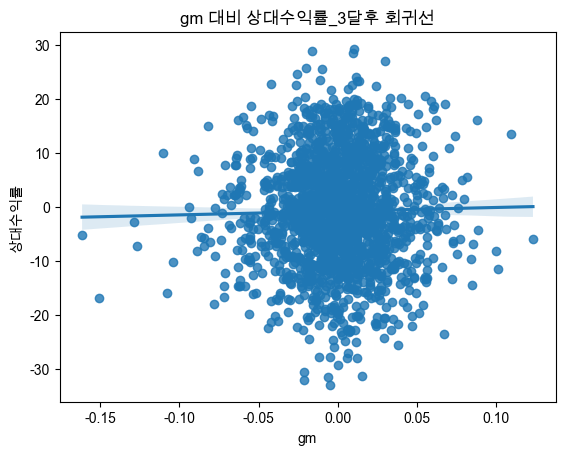

In [27]:
# regplot으로 회귀선과 함께 산점도 그리기
sns.regplot(x='gm_diff', y='상대수익률_3달후', data=df)

# 축 라벨과 타이틀 설정
plt.xlabel('gm')
plt.ylabel('상대수익률')
plt.title('gm 대비 상대수익률_3달후 회귀선')

# 그래프 출력
plt.show()

### 이동평균 구하기

In [28]:
# 데이터프레임에서 'gm' 컬럼의 이동평균 계산
# 예를 들어, 5일 이동평균을 계산한다고 가정
moving_avg = df['gm'].rolling(window=5).mean()

# 계산된 이동평균의 처음 몇 개의 값을 출력
moving_avg.head()


370         NaN
371         NaN
372         NaN
373         NaN
374    2.769817
Name: gm, dtype: float64

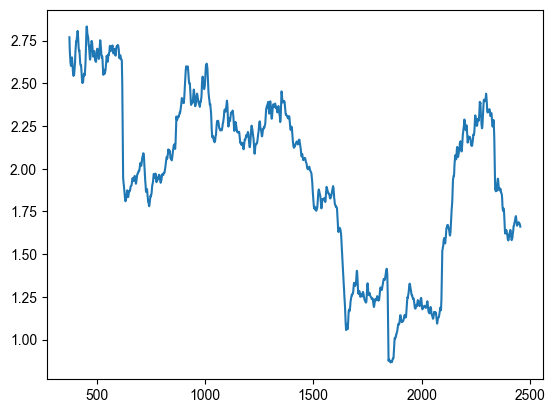

In [29]:
plt.plot(moving_avg)

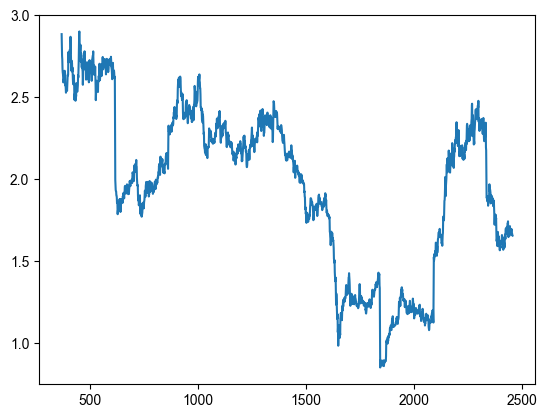

In [30]:
plt.plot(df['gm'])

In [31]:
# 2년(약 680일) 이동평균 계산
moving_avg_2years = df['gm'].rolling(window=680).mean()

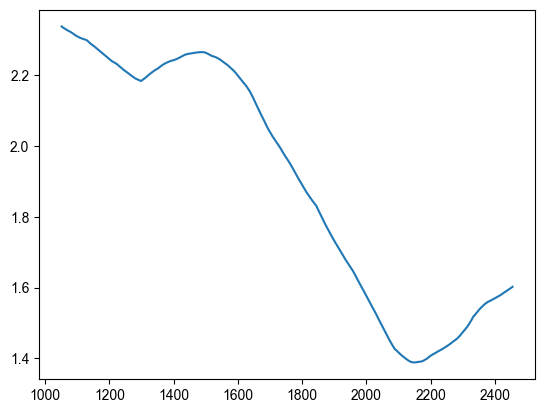

In [32]:
plt.plot(moving_avg_2years)

### 분기별 or 년도별 gm값의 차이 살펴보기

In [33]:
import numpy as np

# Function to remove outliers using IQR
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Removing outliers from 'gm' column
data_clean = remove_outliers(data, 'gm')

In [34]:
# Identifying points where the year changes
year_change_indices = data_clean['Year'].diff() != 0

year_change_indices

369      True
370     False
371     False
372     False
373     False
        ...  
2451    False
2452    False
2453    False
2454    False
2455    False
Name: Year, Length: 2087, dtype: bool

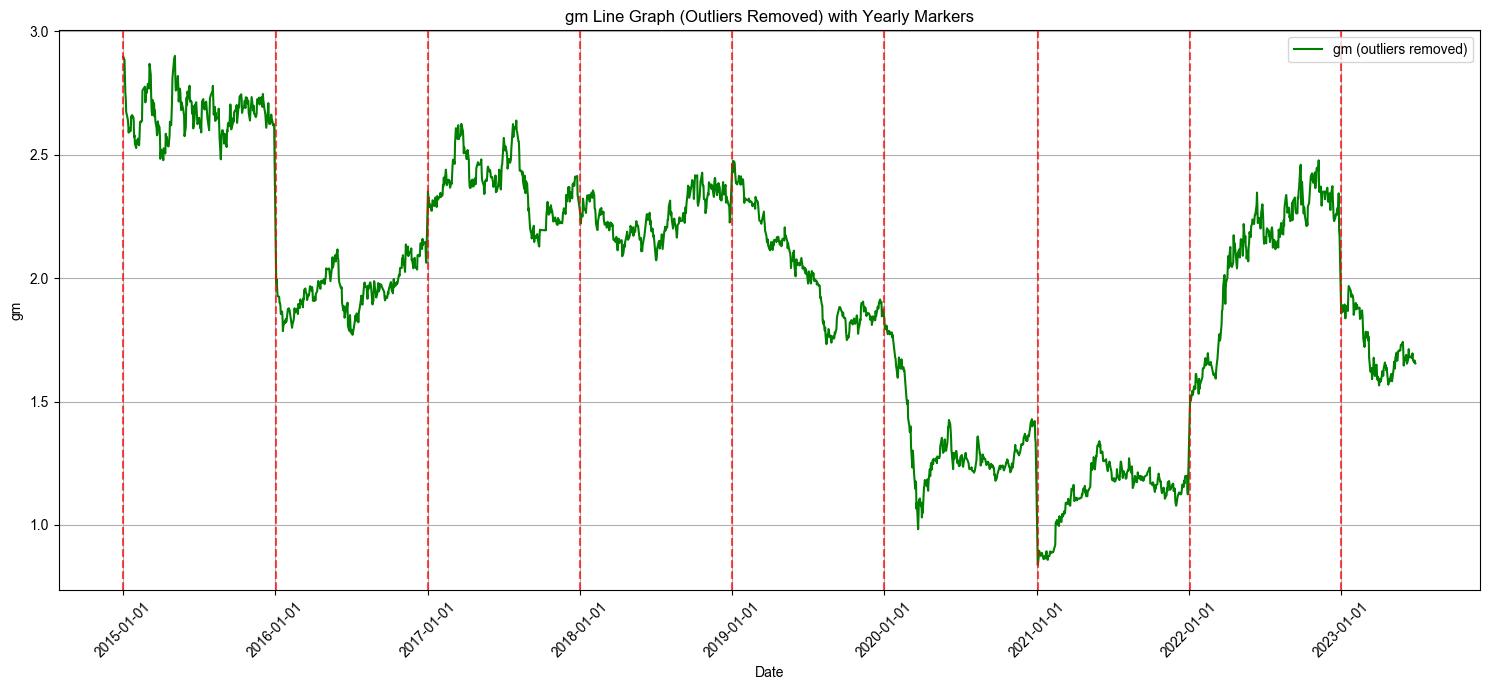

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Plotting the line graph for 'gm' after removing outliers
plt.figure(figsize=(15, 7))
plt.plot(data_clean['Date'], data_clean['gm'], label='gm (outliers removed)', color='green')

# Adding vertical lines at the start of each year
for date in data_clean.loc[year_change_indices, 'Date']:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)

# Formatting the plot
plt.title('gm Line Graph (Outliers Removed) with Yearly Markers')
plt.xlabel('Date')
plt.ylabel('gm')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()

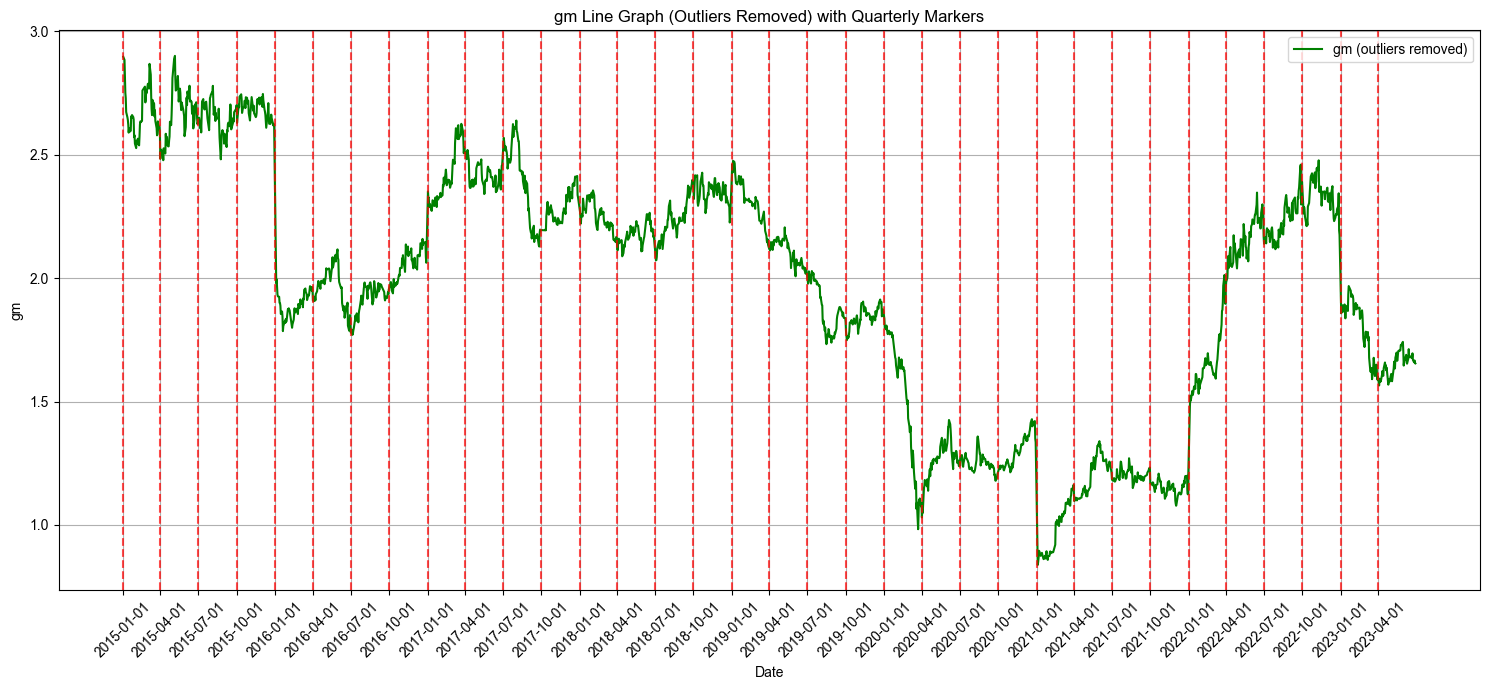

In [36]:
# Finding the first day of each January, April, July, and October
quarter_starts = data_clean['Date'].dt.to_period('Q').dt.start_time.unique()

# Plotting the line graph for 'gm' after removing outliers
plt.figure(figsize=(15, 7))
plt.plot(data_clean['Date'], data_clean['gm'], label='gm (outliers removed)', color='green')

# Adding vertical lines at the start of January, April, July, and October
for date in quarter_starts:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)

# Setting x-ticks to only the start of each quarter
plt.xticks(quarter_starts, [pd.to_datetime(str(date)).strftime('%Y-%m-%d') for date in quarter_starts], rotation=45)

# Formatting the plot
plt.title('gm Line Graph (Outliers Removed) with Quarterly Markers')
plt.xlabel('Date')
plt.ylabel('gm')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Displaying the plot
plt.show()

/var/folders/yd/1_xwcyjj6z58p2vptxk1dwvm0000gn/T/ipykernel_67272/2238753572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['gm_diff'] = data_clean['gm'].diff()


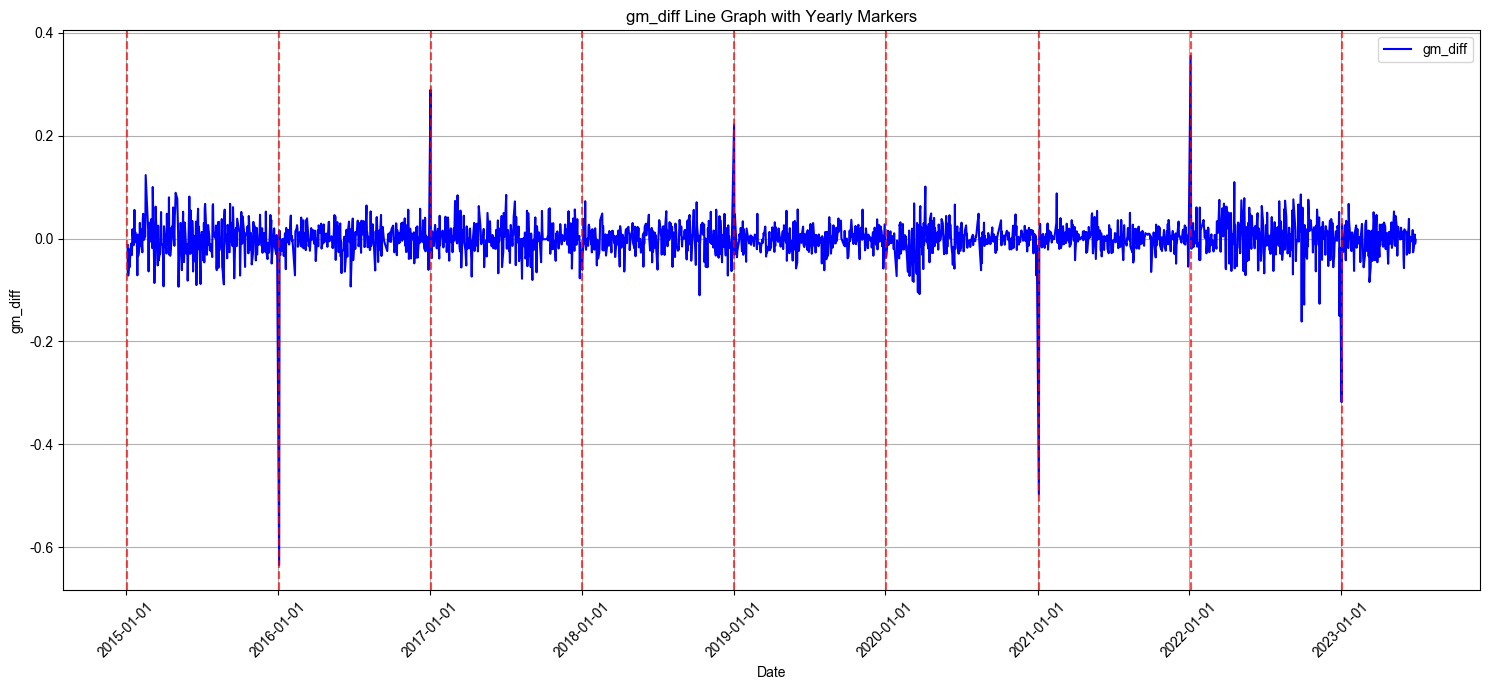

In [37]:
# Calculating the difference (diff) of 'gm' to create 'gm_diff'
data_clean['gm_diff'] = data_clean['gm'].diff()

# Plotting the line graph for 'gm_diff'
plt.figure(figsize=(15, 7))
plt.plot(data_clean['Date'], data_clean['gm_diff'], label='gm_diff', color='blue')

# Adding vertical lines at the start of each year
for date in data_clean.loc[year_change_indices, 'Date']:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)

# Formatting the plot
plt.title('gm_diff Line Graph with Yearly Markers')
plt.xlabel('Date')
plt.ylabel('gm_diff')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()

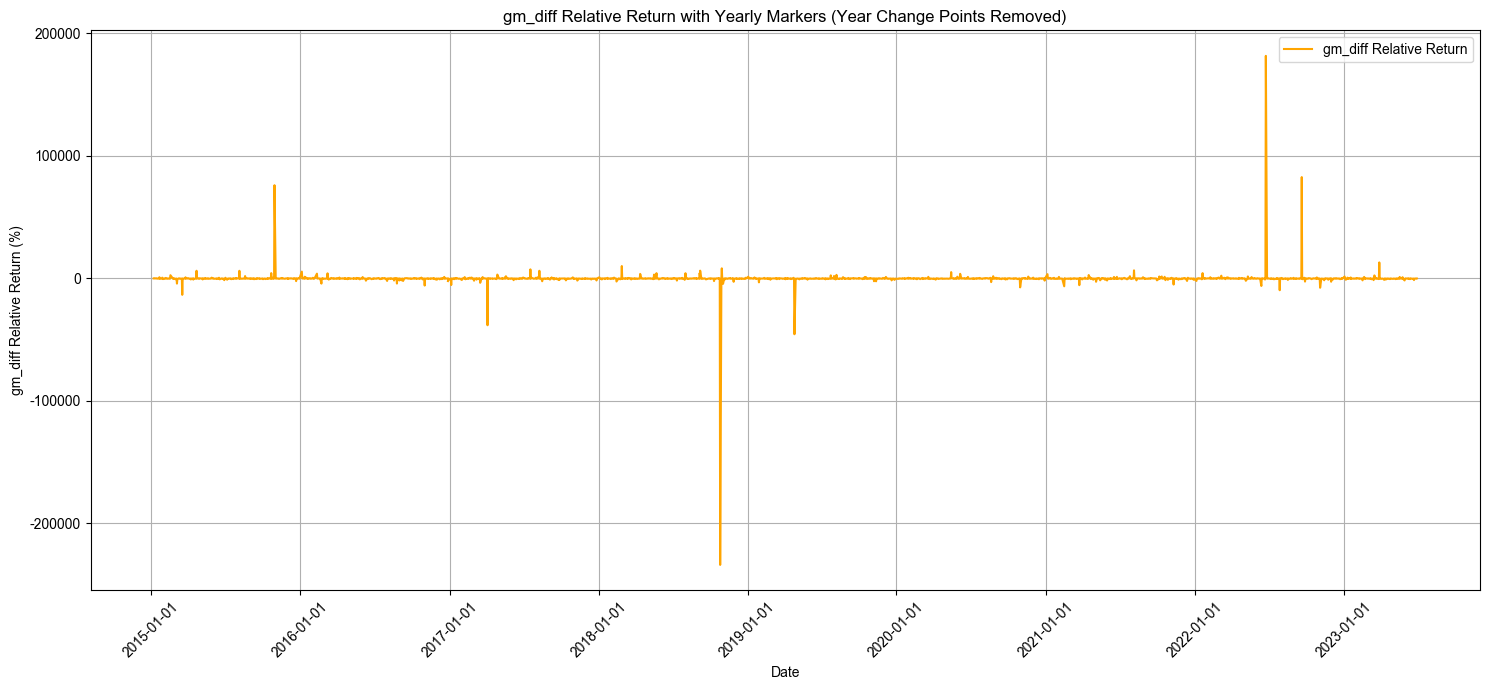

In [38]:
# Identifying the rows where the year changes
year_change_rows = data_clean[year_change_indices]

# Removing the rows where the year changes to eliminate large variations in 'gm' at these points
data_no_year_change = data_clean.drop(year_change_rows.index)

# Calculating the difference (diff) of 'gm' again after removing year change points
data_no_year_change['gm_diff'] = data_no_year_change['gm'].diff()

# Calculating relative return (as a percentage change) for 'gm_diff'
data_no_year_change['gm_diff_pct_change'] = data_no_year_change['gm_diff'].pct_change() * 100

# Plotting the line graph for 'gm_diff_pct_change'
plt.figure(figsize=(15, 7))
plt.plot(data_no_year_change['Date'], data_no_year_change['gm_diff_pct_change'], label='gm_diff Relative Return', color='orange')

# Adding vertical lines at the start of each year
for date in data_no_year_change.loc[year_change_indices, 'Date']:
    plt.axvline(x=date, color='red', linestyle='--', alpha=0.7)

# Formatting the plot
plt.title('gm_diff Relative Return with Yearly Markers (Year Change Points Removed)')
plt.xlabel('Date')
plt.ylabel('gm_diff Relative Return (%)')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()

# Displaying the plot
plt.show()

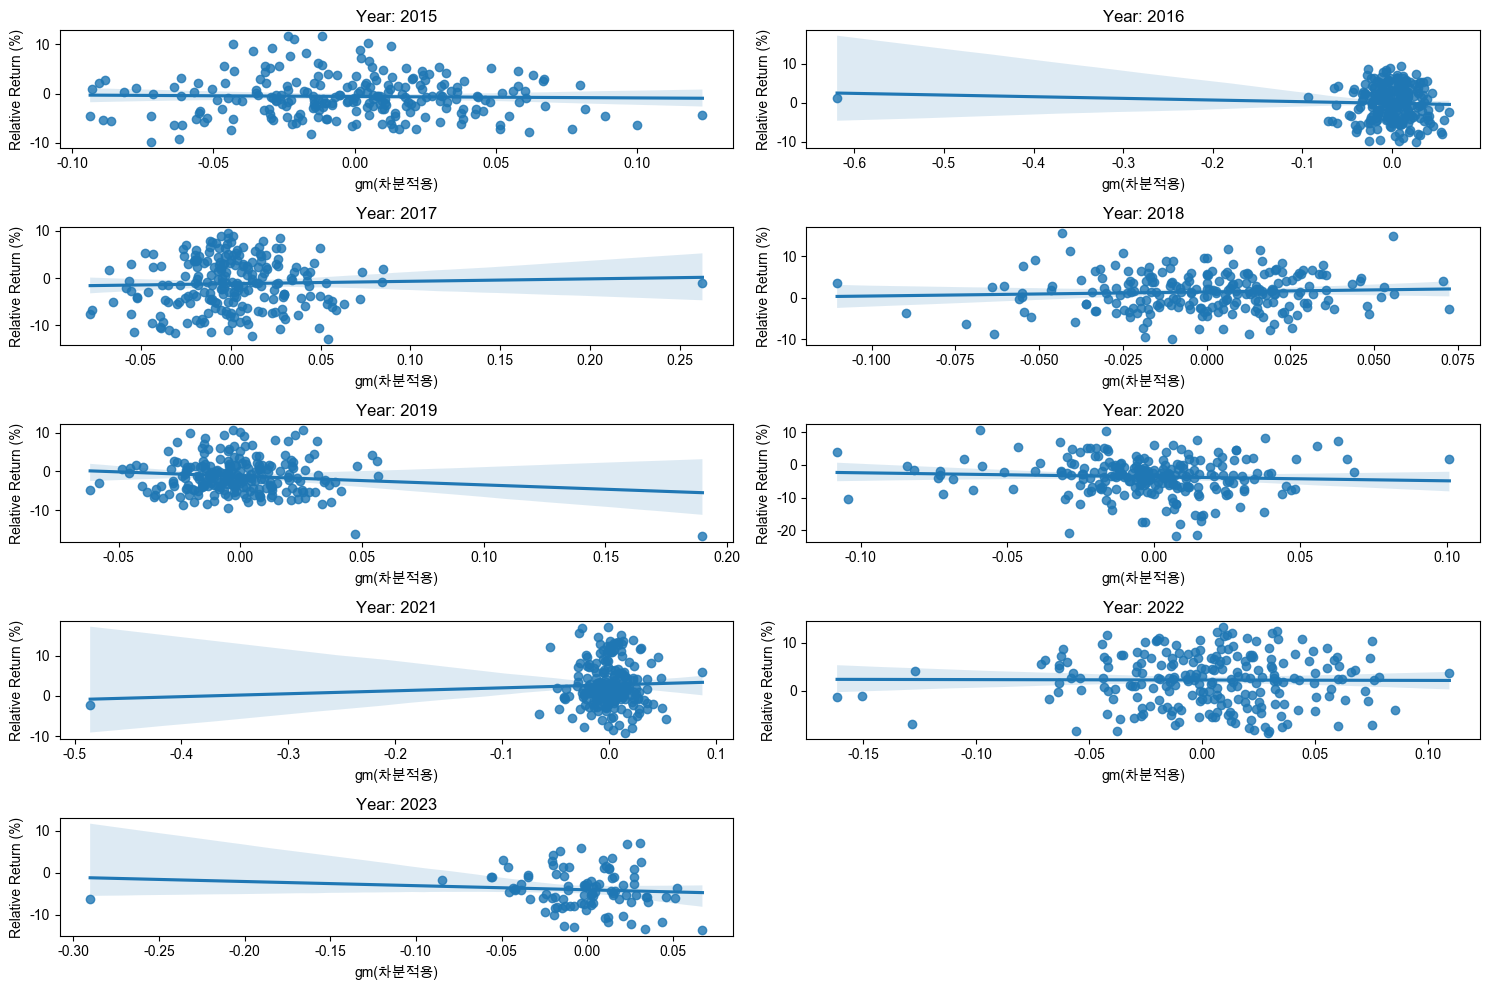

In [39]:
import seaborn as sns

# Extracting the year from the date
data_no_year_change['Year'] = data_no_year_change['Date'].dt.year

# Creating a plot for each year
unique_years = data_no_year_change['Year'].unique()

# Setting up the plot size
plt.figure(figsize=(15, 10))

# Iterating over each year and creating a subplot for each
for i, year in enumerate(unique_years):
    plt.subplot(len(unique_years) // 2 + len(unique_years) % 2, 2, i + 1)
    sns.regplot(x='gm_diff', y='상대수익률_1달후', data=data_no_year_change[data_no_year_change['Year'] == year])
    plt.title(f'Year: {year}')
    plt.xlabel('gm(차분적용)')
    plt.ylabel('Relative Return (%)')

plt.tight_layout()
plt.show()


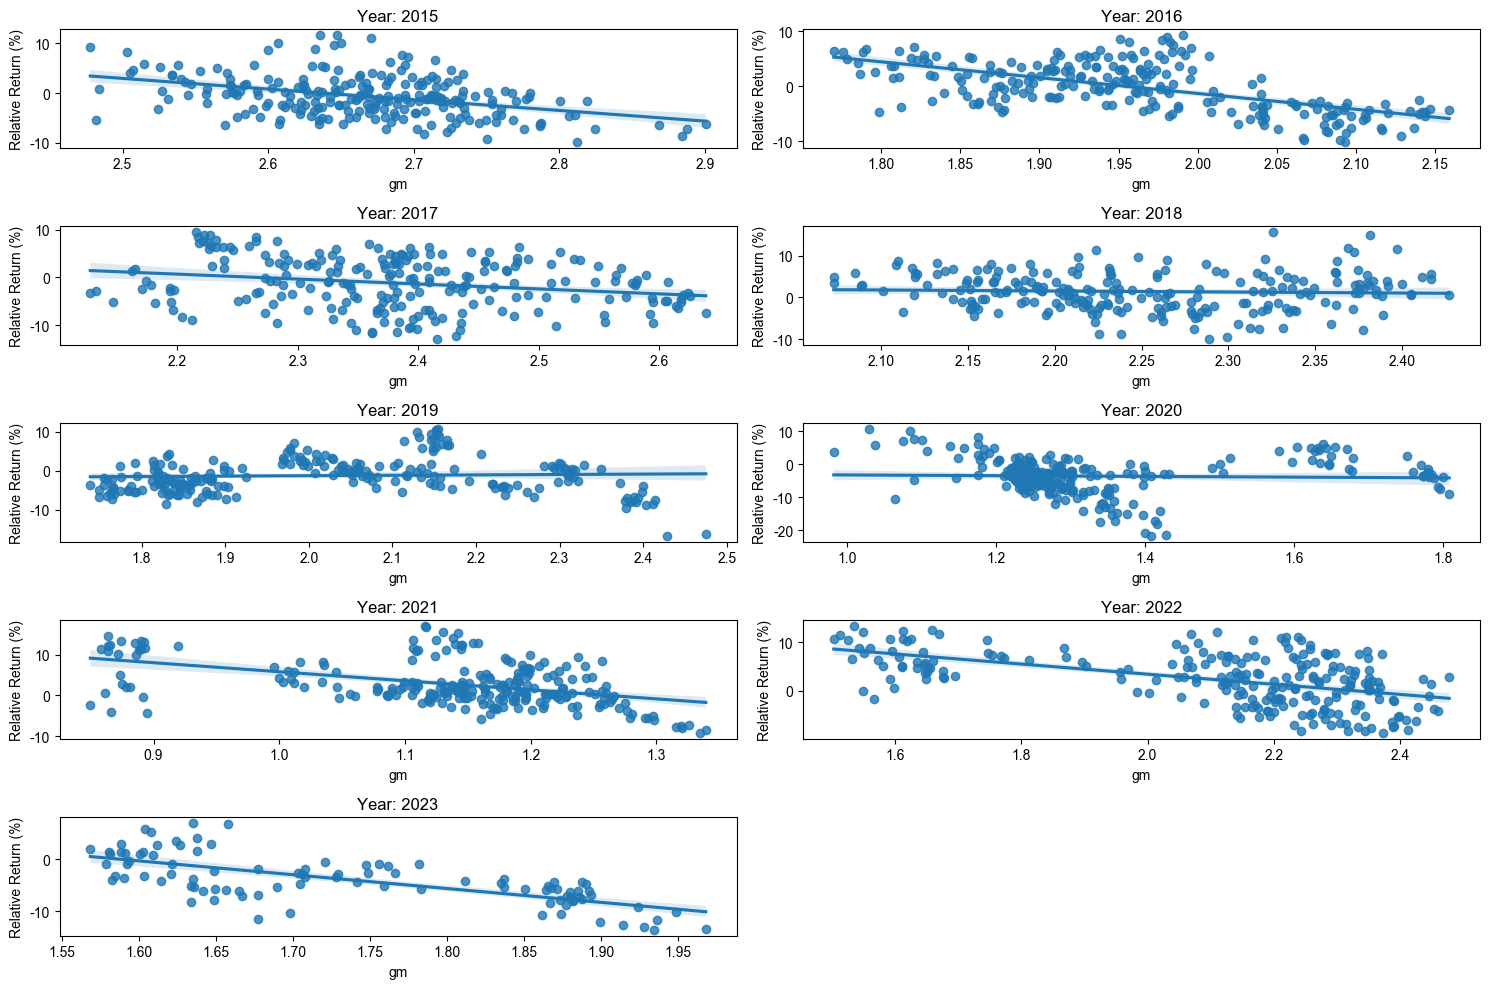

In [40]:
import seaborn as sns

# Extracting the year from the date
data_no_year_change['Year'] = data_no_year_change['Date'].dt.year

# Creating a plot for each year
unique_years = data_no_year_change['Year'].unique()

# Setting up the plot size
plt.figure(figsize=(15, 10))

# Iterating over each year and creating a subplot for each
for i, year in enumerate(unique_years):
    plt.subplot(len(unique_years) // 2 + len(unique_years) % 2, 2, i + 1)
    sns.regplot(x='gm', y='상대수익률_1달후', data=data_no_year_change[data_no_year_change['Year'] == year])
    plt.title(f'Year: {year}')
    plt.xlabel('gm')
    plt.ylabel('Relative Return (%)')

plt.tight_layout()
plt.show()


In [41]:
# 표준화 적용
data_no_year_change['gm_scaled'] = scaler.fit_transform(data_no_year_change[['gm']])

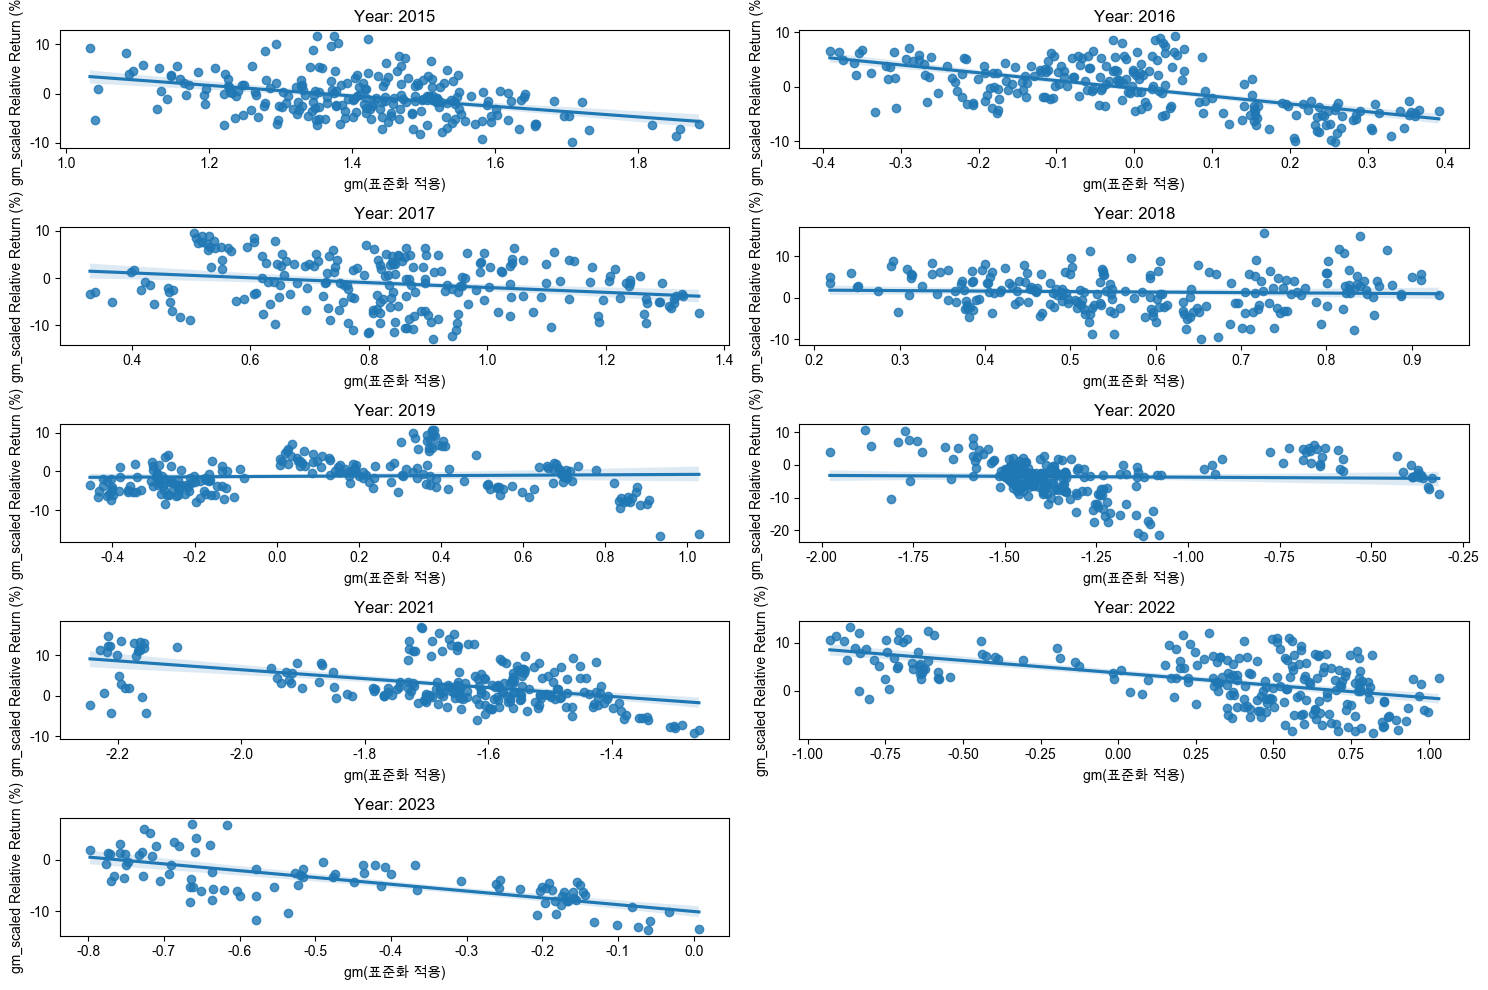

In [42]:
import seaborn as sns

# Extracting the year from the date
data_no_year_change['Year'] = data_no_year_change['Date'].dt.year

# Creating a plot for each year
unique_years = data_no_year_change['Year'].unique()

# Setting up the plot size
plt.figure(figsize=(15, 10))

# Iterating over each year and creating a subplot for each
for i, year in enumerate(unique_years):
    plt.subplot(len(unique_years) // 2 + len(unique_years) % 2, 2, i + 1)
    sns.regplot(x='gm_scaled', y='상대수익률_1달후', data=data_no_year_change[data_no_year_change['Year'] == year])
    plt.title(f'Year: {year}')
    plt.xlabel('gm(표준화 적용)')
    plt.ylabel('gm_scaled Relative Return (%)')

plt.tight_layout()
plt.show()

<Axes: xlabel='gm_diff', ylabel='상대수익률_1달후'>

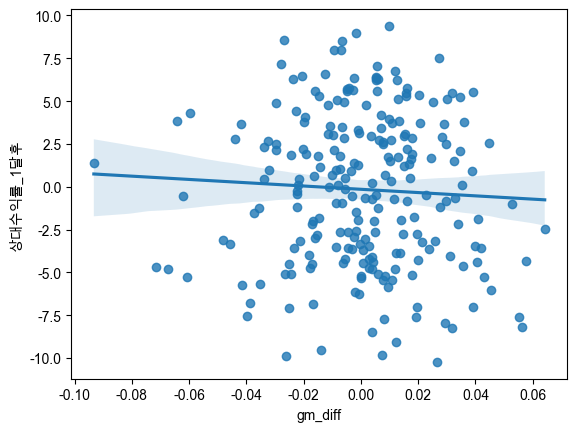

In [43]:
tmp = df[df['Year'] == 2016]
sns.regplot(x = 'gm_diff', y = '상대수익률_1달후', data = tmp)

<Axes: xlabel='gm', ylabel='상대수익률_1달후'>

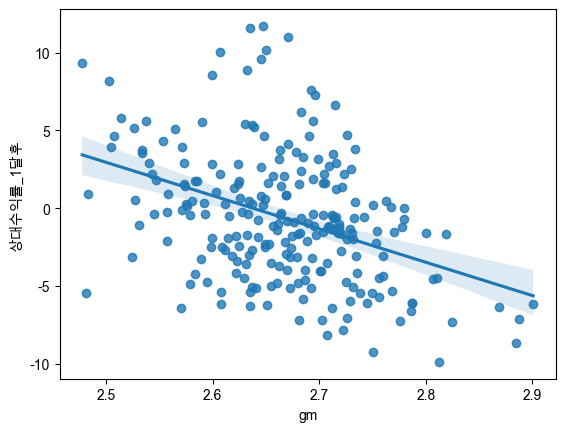

In [44]:
tmp = df[df['Year'] == 2015]
sns.regplot(x = 'gm', y = '상대수익률_1달후', data = tmp)

### 분기별로 gm 표준화

In [45]:
data['Date'] = pd.to_datetime(data['Date'])
data['YearQuarter'] = data['Date'].dt.to_period('Q')

In [46]:
data['gm_standardized'] = data.groupby('YearQuarter')['gm'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

In [47]:
data['상대수익률_1달후_scaled'] = data.groupby('YearQuarter')['상대수익률_1달후'].transform(
    lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten()
)

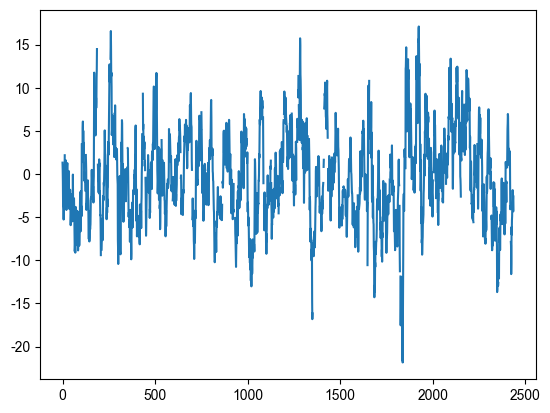

In [48]:
plt.plot(data['상대수익률_1달후'])

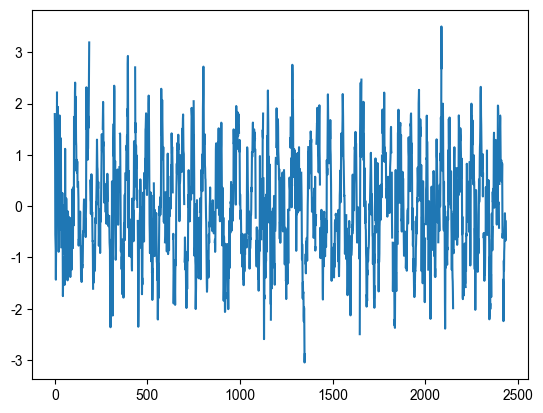

In [49]:
plt.plot(data['상대수익률_1달후_scaled'])

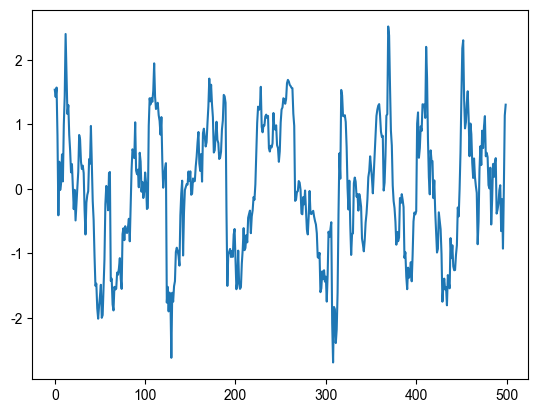

In [50]:
tmp = data.iloc[:500]
plt.plot(tmp['gm_standardized'])

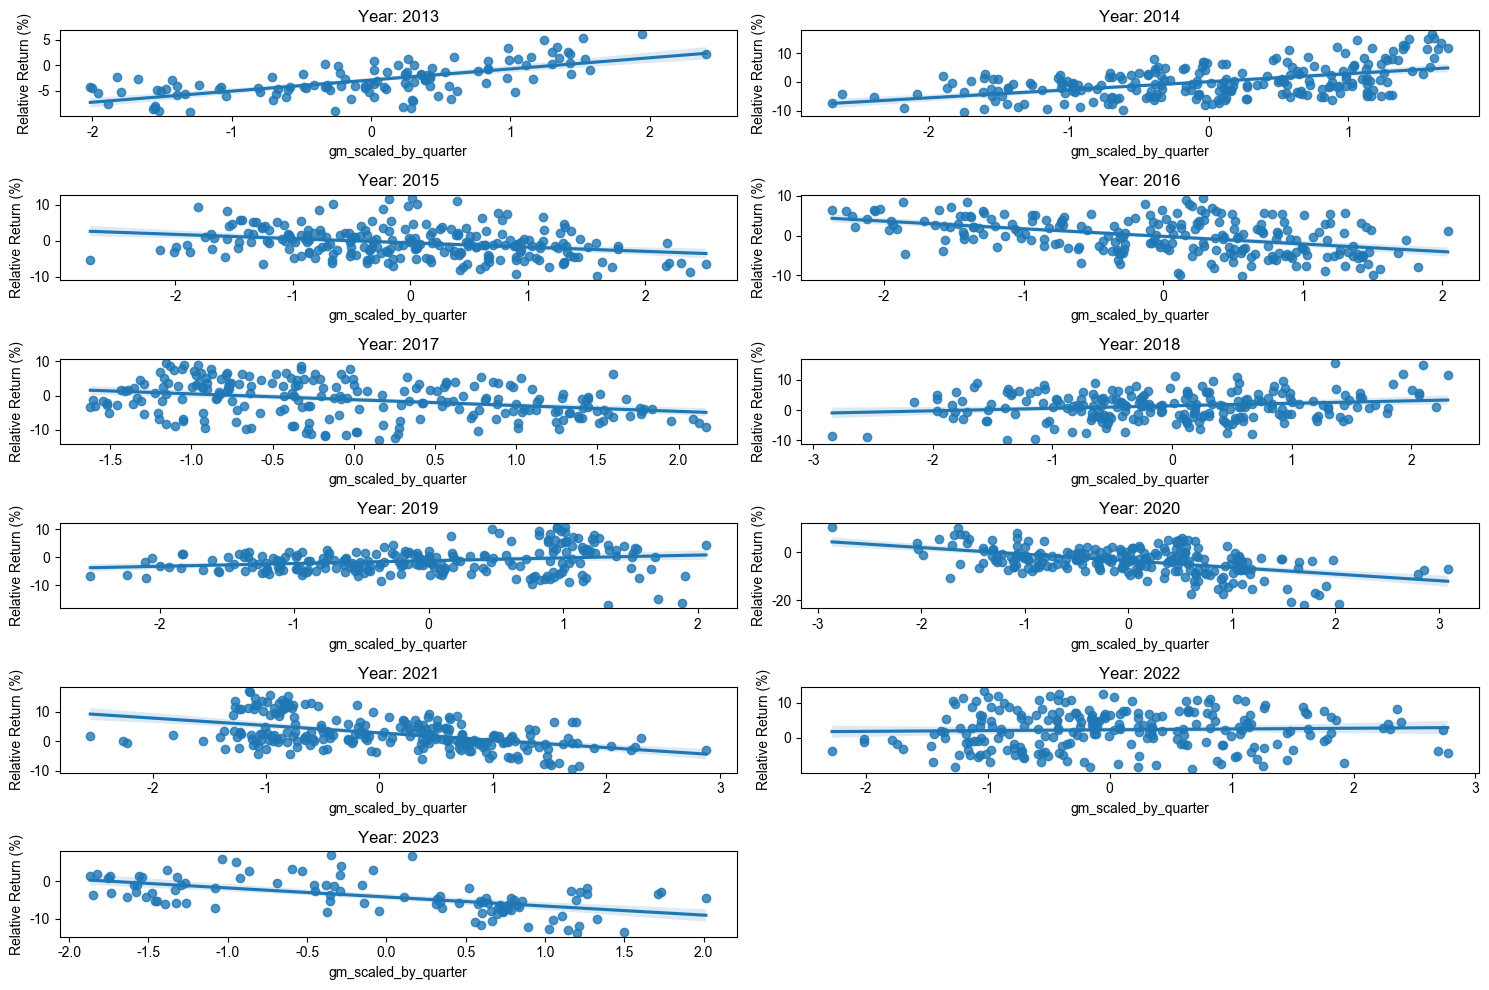

In [51]:
import seaborn as sns

# Extracting the year from the date
data['Year'] = data['Date'].dt.year

# Creating a plot for each year
unique_years = data['Year'].unique()

# Setting up the plot size
plt.figure(figsize=(15, 10))

# Iterating over each year and creating a subplot for each
for i, year in enumerate(unique_years):
    plt.subplot(len(unique_years) // 2 + len(unique_years) % 2, 2, i + 1)
    sns.regplot(x='gm_standardized', y='상대수익률_1달후', data=data[data['Year'] == year])
    plt.title(f'Year: {year}')
    plt.xlabel('gm_scaled_by_quarter')
    plt.ylabel('Relative Return (%)')

plt.tight_layout()
plt.show()

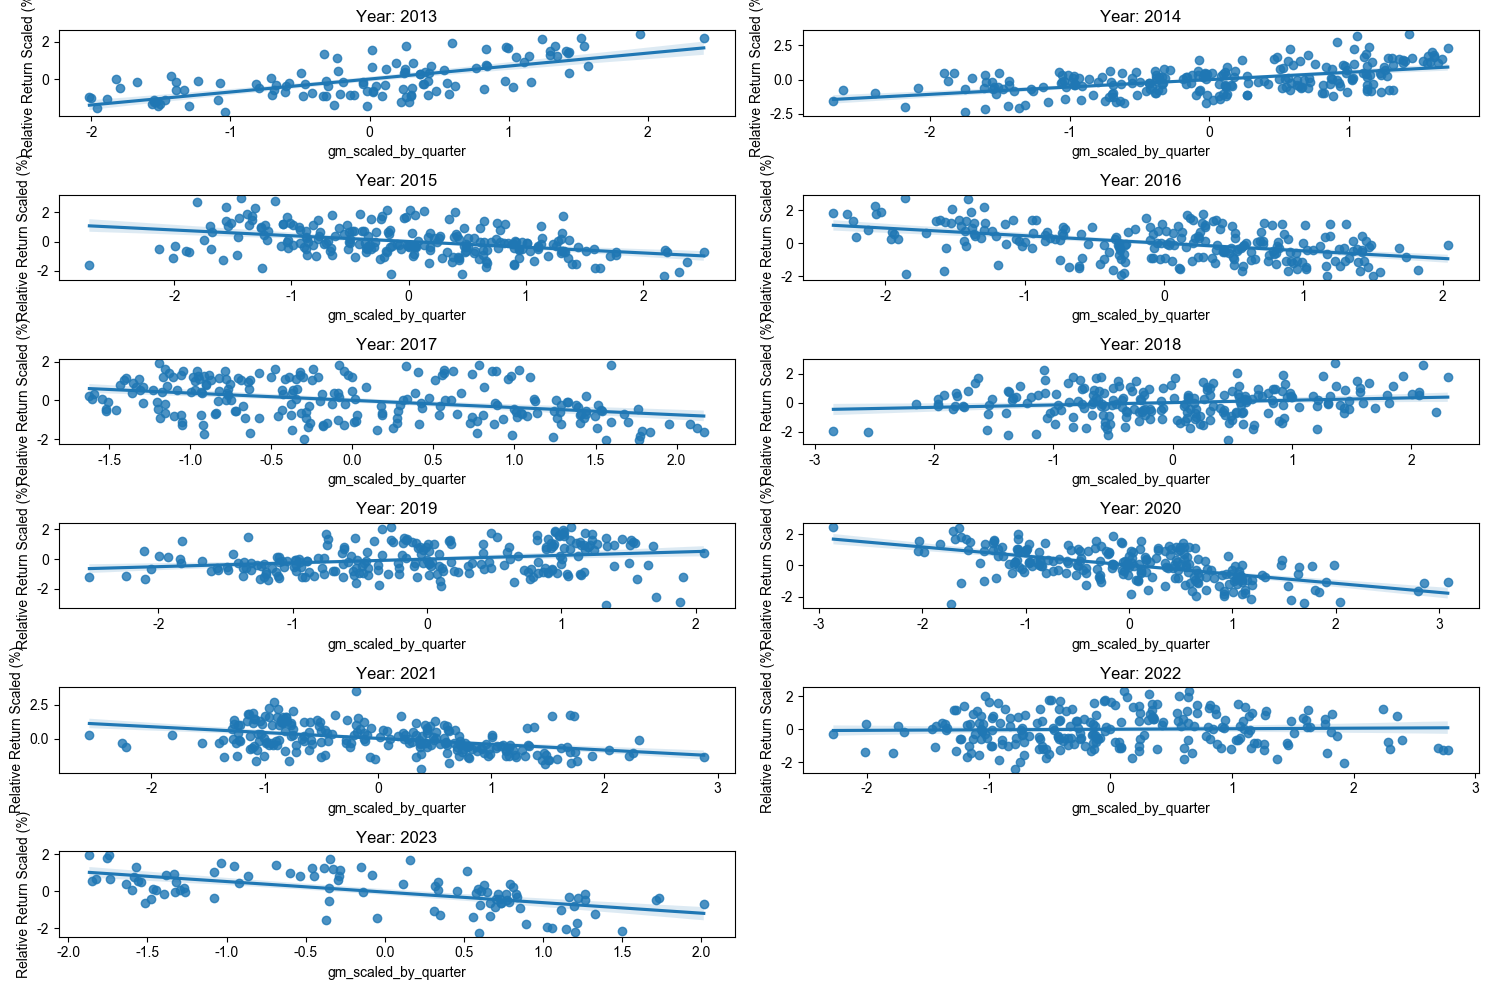

In [52]:
import seaborn as sns

# Extracting the year from the date
data['Year'] = data['Date'].dt.year

# Creating a plot for each year
unique_years = data['Year'].unique()

# Setting up the plot size
plt.figure(figsize=(15, 10))

# Iterating over each year and creating a subplot for each
for i, year in enumerate(unique_years):
    plt.subplot(len(unique_years) // 2 + len(unique_years) % 2, 2, i + 1)
    sns.regplot(x='gm_standardized', y='상대수익률_1달후_scaled', data=data[data['Year'] == year])
    plt.title(f'Year: {year}')
    plt.xlabel('gm_scaled_by_quarter')
    plt.ylabel('Relative Return Scaled (%)')

plt.tight_layout()
plt.show()

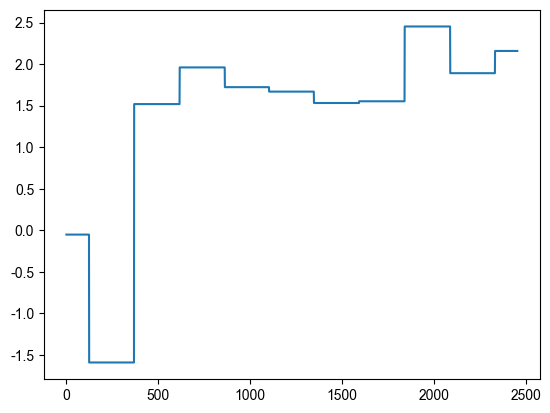

In [53]:
plt.plot(data['ROE'])

In [54]:
data

,Date,종가(원),PBR(배),us_10_treasury,Quarter,COE,영업이익(원),금융손익(비영업)(원),관계기업투자등관련손익(비영업)(원),총자본(원),세전이익,순이익,Year,ROE,gm,종가_1주후,종가_2주후,종가_1달후,종가_3달후,종가_6달후,수익률_1주후,수익률_2주후,수익률_1달후,수익률_3달후,수익률_6달후,kospi,kospi_1주후,kospi_2주후,kospi_1달후,kospi_3달후,kospi_6달후,kospi_수익률_1주후,kospi_수익률_2주후,kospi_수익률_1달후,kospi_수익률_3달후,kospi_수익률_6달후,상대수익률_1주후,상대수익률_2주후,상대수익률_1달후,상대수익률_3달후,상대수익률_6달후,YearQuarter,gm_standardized,상대수익률_1달후_scaled
0,2013-07-01,35100,0.69631,2.490,2013Q3,6.490,307798000000,-47860000000,-798000000,13233068000000,259140000000,2.073120e+11,2013,-0.051640,-87.510945,35600.0,35400.0,36400.0,36000.0,30550.0,1.424501,0.854701,3.703704,2.564103,-12.962963,1855.729980,1816.849976,1875.160034,1899.890015,2011.800049,2001.589966,-2.095133,1.047030,2.379658,8.410171,7.859979,3.519634,-0.192329,1.324045,-5.846069,-20.822942,2013Q3,1.538378,1.794658
1,2013-07-02,35350,0.70127,2.469,2013Q3,6.469,307798000000,-47860000000,-798000000,13233068000000,259140000000,2.073120e+11,2013,-0.051640,-87.849130,36200.0,35000.0,36700.0,36000.0,31000.0,2.404526,-0.990099,3.818953,1.838755,-12.305516,1855.020020,1830.349976,1866.359985,1917.050049,1996.959961,1999.300049,-1.329907,0.611312,3.343901,7.651666,7.777815,3.734433,-1.601411,0.475053,-5.812911,-20.083331,2013Q3,1.426175,1.379081
2,2013-07-03,35000,0.69433,2.501,2013Q3,6.501,307798000000,-47860000000,-798000000,13233068000000,259140000000,2.073120e+11,2013,-0.051640,-87.410003,35800.0,34050.0,36400.0,36400.0,30950.0,2.285714,-2.714286,4.000000,4.000000,-11.571429,1824.660034,1824.160034,1887.489990,1914.030029,1998.869995,2002.280029,-0.027402,3.443379,4.897898,9.547530,9.734416,2.313117,-6.157664,-0.897898,-5.547530,-21.305844,2013Q3,1.571868,0.707030
3,2013-07-04,35900,0.71219,2.501,2013Q3,6.501,307798000000,-47860000000,-798000000,13233068000000,259140000000,2.073120e+11,2013,-0.051640,-89.658419,35850.0,34600.0,36250.0,36500.0,31100.0,-0.139276,-3.621170,0.974930,1.671309,-13.370474,1839.140015,1877.599976,1875.479980,1920.739990,1999.469971,2011.339966,2.091193,1.975922,4.436855,8.717659,9.363069,-2.230468,-5.597092,-3.461925,-7.046350,-22.733543,2013Q3,0.825888,-0.548045
4,2013-07-05,36200,0.71814,2.715,2013Q3,6.715,307798000000,-47860000000,-798000000,13233068000000,259140000000,2.073120e+11,2013,-0.051640,-93.383506,36200.0,35550.0,36600.0,35950.0,30850.0,0.000000,-1.795580,1.104972,-0.690608,-14.779006,1833.310059,1869.979980,1871.410034,1923.380005,1996.979980,1967.189941,2.000203,2.078207,4.912969,8.927564,7.302632,-2.000203,-3.873787,-3.807996,-9.618171,-22.081637,2013Q3,-0.410021,-0.717445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,2023-06-23,30500,0.46524,3.739,2023Q2,7.739,576108000000,-22472000000,5952000000,18453740000000,559588000000,4.476704e+11,2023,2.157981,1.668455,29800.0,NaN,NaN,NaN,NaN,-2.295082,NaN,NaN,NaN,NaN,2570.100098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023Q2,0.392751,NaN
2452,2023-06-26,30400,0.46372,3.719,2023Q2,7.719,576108000000,-22472000000,5952000000,18453740000000,559588000000,4.476704e+11,2023,2.157981,1.658706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2582.199951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023Q2,0.176833,NaN
2453,2023-06-27,30350,0.46296,3.768,2023Q2,7.768,576108000000,-22472000000,5952000000,18453740000000,559588000000,4.476704e+11,2023,2.157981,1.666499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2581.389893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023Q2,0.349448,NaN
2454,2023-06-28,30400,0.46372,3.710,2023Q2,7.710,576108000000,-22472000000,5952000000,18453740000000,559588000000,4.476704e+11,2023,2.157981,1.656772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2564.189941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023Q2,0.133998,NaN
